In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [47]:
df=pd.read_csv('diabetes_UCI.csv')
print(df.columns.values)
print('df=',df)
print('df_Info=',df.info())

df=df.reset_index()
df.drop(['index'],axis='columns',inplace=True)

YRdf=pd.DataFrame(df['Outcome'])
YR=np.array(YRdf).ravel()
print('np.unique(YR)=',np.unique(YR))

Xdf=df.copy()
Xdf.drop(['Outcome'],axis='columns',inplace=True)

K=int(np.max(YR))
X=np.array(Xdf)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df=      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0

In [6]:
Xdf.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


VISUALIZATION

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

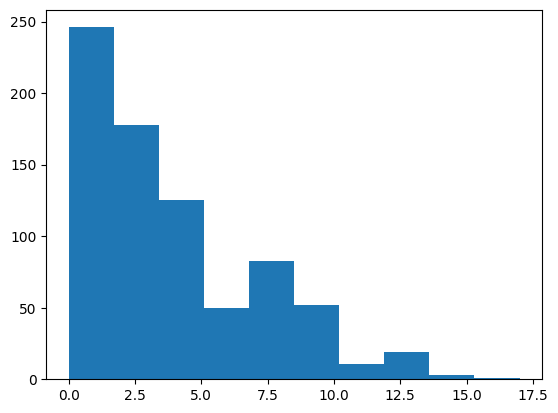

In [7]:
plt.hist(X[:,0]) #on recupere seulement la colonne (grossesses)

([<matplotlib.axis.XTick at 0x1c7a9e4a910>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

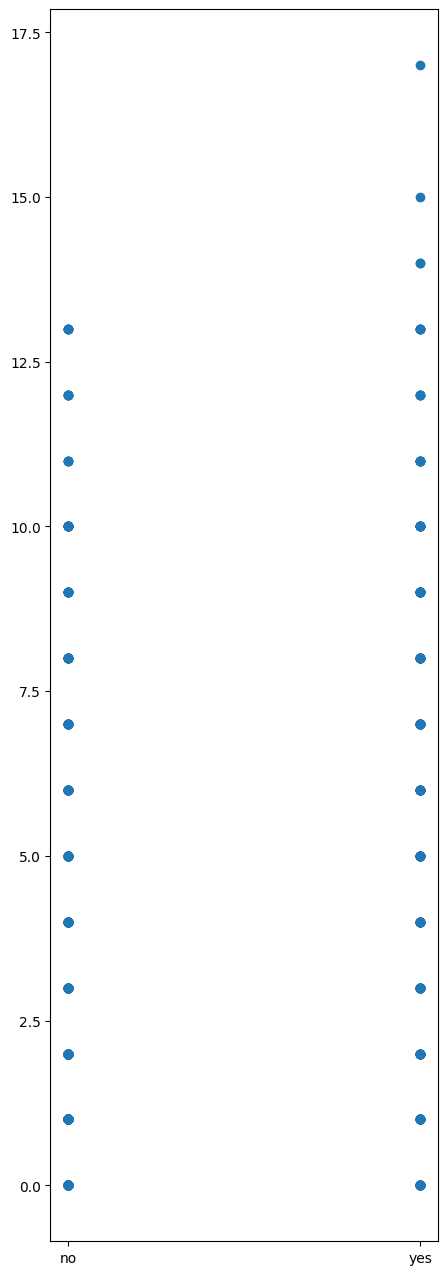

In [9]:
plt.figure(figsize=(5,16))
plt.scatter(YR,X[:,0])
x_ticks=[0,1]

#specify x-axis labels
x_labels=['no','yes']

#dd x-axis values to plot
plt.xticks(ticks=x_ticks,labels=x_labels)

Visualization related to Glucose

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

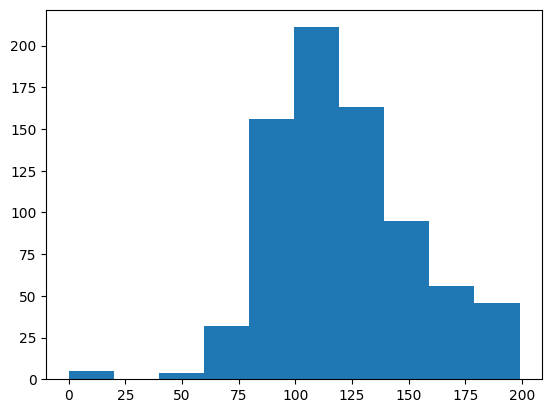

In [10]:
plt.hist(X[:,1]) #on recupere la deuxieme colonne (glucose)

In [11]:
Glucose_no_d=X[np.where(YR==0),1] #selectionne les ligne ou outcome =0 (non diabetique)
Glucose_d= X[np.where(YR==1),1]  #selectionne les ligne ou outcome =1 (diabetique)

In [12]:
Glucose_no_d=np.reshape(Glucose_no_d,(-1,1))
Glucose_d=np.reshape(Glucose_d,(-1,1))

(array([  3.,   0.,   4.,  28., 129., 167.,  99.,  49.,  12.,   9.]),
 array([  0. ,  19.7,  39.4,  59.1,  78.8,  98.5, 118.2, 137.9, 157.6,
        177.3, 197. ]),
 <BarContainer object of 10 artists>)

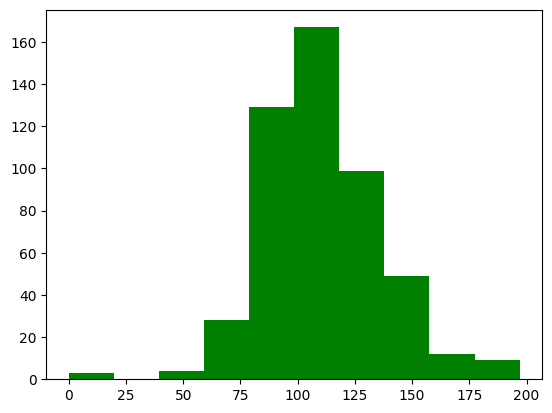

In [14]:
plt.hist(Glucose_no_d[:,0],color="green",label='no diabete')

(array([ 2.,  0.,  0.,  1., 13., 54., 63., 51., 45., 39.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

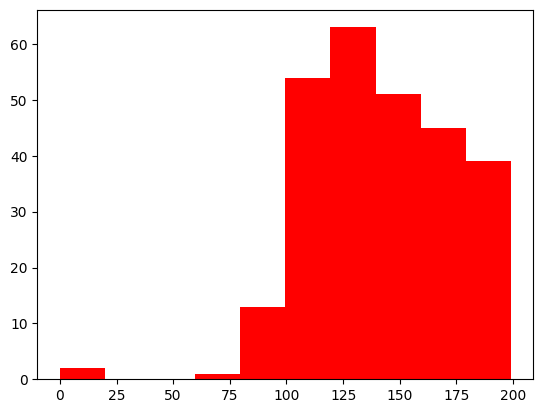

In [15]:
plt.hist(Glucose_d[:,0],color='red',label='with diabete')

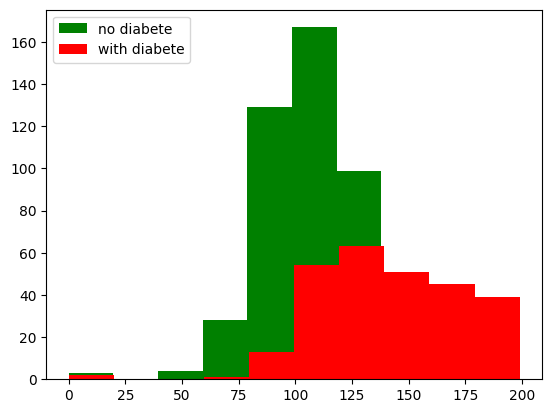

In [16]:
plt.hist(Glucose_no_d[:,0],color="green",label='no diabete')
plt.hist(Glucose_d[:,0],color='red',label='with diabete')
plt.legend(loc='upper left')
plt.show()

Models

Logistic Regression

In [19]:
X.shape[0]

768

In [48]:
test_size=268/X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X,YR,test_size=test_size)

In [21]:
print("X train shape :",X_train.shape)
print("Y train shape :",y_train.shape)

print("X test shape :",X_test.shape)
print("Y test shape :",y_test.shape)


X train shape : (500, 8)
Y train shape : (500,)
X test shape : (268, 8)
Y test shape : (268,)


In [22]:
LR=LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [23]:
LR.score(X_train,y_train)

0.782

In [24]:
LR.score(X_test,y_test)

0.7686567164179104

<Figure size 2500x2500 with 0 Axes>

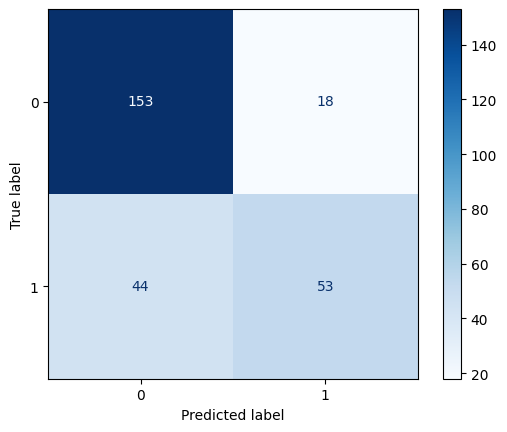

In [33]:
plt.figure(figsize=(25,25))
disp=ConfusionMatrixDisplay.from_estimator(
    LR,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

Prediction


In [39]:
LR.predict_proba(np.reshape(X_test[1,:], (1,-1)))

array([[0.44231273, 0.55768727]])

In [40]:
y_test[1]

0

In [41]:
LR.classes_

array([0, 1], dtype=int64)

In [42]:
LR.predict(np.reshape(X_test[1,:], (1,-1)))

array([1], dtype=int64)

In [50]:
LR.predict(np.reshape(X_test[4,:], (1,-1)))

array([0], dtype=int64)

In [49]:
y_test[4]

0

cross validation


In [51]:
scores=cross_val_score(LR,X,YR,cv=20)

In [52]:
LR=LogisticRegression(max_iter=1000)

In [54]:
cv=np.arange(5,30,1)
for i in cv:
    scores=cross_val_score(LR,X,YR,cv=i)
    print(f"mean with cv{i} : {np.mean(scores)}")

mean with cv5 : 0.7721925133689839
mean with cv6 : 0.7760416666666666
mean with cv7 : 0.7761229596091982
mean with cv8 : 0.7721354166666667
mean with cv9 : 0.7682626538987687
mean with cv10 : 0.7734791524265209
mean with cv11 : 0.7734989648033125
mean with cv12 : 0.7747395833333334
mean with cv13 : 0.7722729248152977
mean with cv14 : 0.776046176046176
mean with cv15 : 0.7760432378079437
mean with cv16 : 0.76953125
mean with cv17 : 0.774765558397272
mean with cv18 : 0.7723022025347608
mean with cv19 : 0.7762516046213094
mean with cv20 : 0.77361673414305
mean with cv21 : 0.774917774917775
mean with cv22 : 0.7722307104660046
mean with cv23 : 0.7722235139114934
mean with cv24 : 0.7747395833333334
mean with cv25 : 0.7723870967741935
mean with cv26 : 0.7723695844385499
mean with cv27 : 0.7737182995803685
mean with cv28 : 0.773762282690854
mean with cv29 : 0.7737007564593772


In [58]:
alphas=np.arange(10e-6,10e-3,10e-6)
res=np.zeros((alphas.shape[0],8))
acc=np.zeros((alphas.shape[0]))
acc.shape

(999,)

Lasso

In [66]:


lambda_ = 0.01
LR_Lasso = LogisticRegression(penalty='l1', solver='saga', C=lambda_, max_iter=1000)

alphas = np.arange(10e-6, 10e-3, 10e-6)
num_features = 8
res = np.zeros((alphas.shape[0], 8))
acc = np.zeros((alphas.shape[0]))

for i, alpha in enumerate(alphas):
    LR_Lasso = LogisticRegression(penalty='l1', solver='saga', C=alpha, max_iter=10000).fit(X_train, y_train)
    acc[i] = LR_Lasso.score(X_train, y_train)
    for j, coeff in enumerate(LR_Lasso.coef_.ravel()):
        res[i, j] = coeff


c:\Users\yzedira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\yzedira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\yzedira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\yzedira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\yzedira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

<Figure size 2280x1080 with 0 Axes>

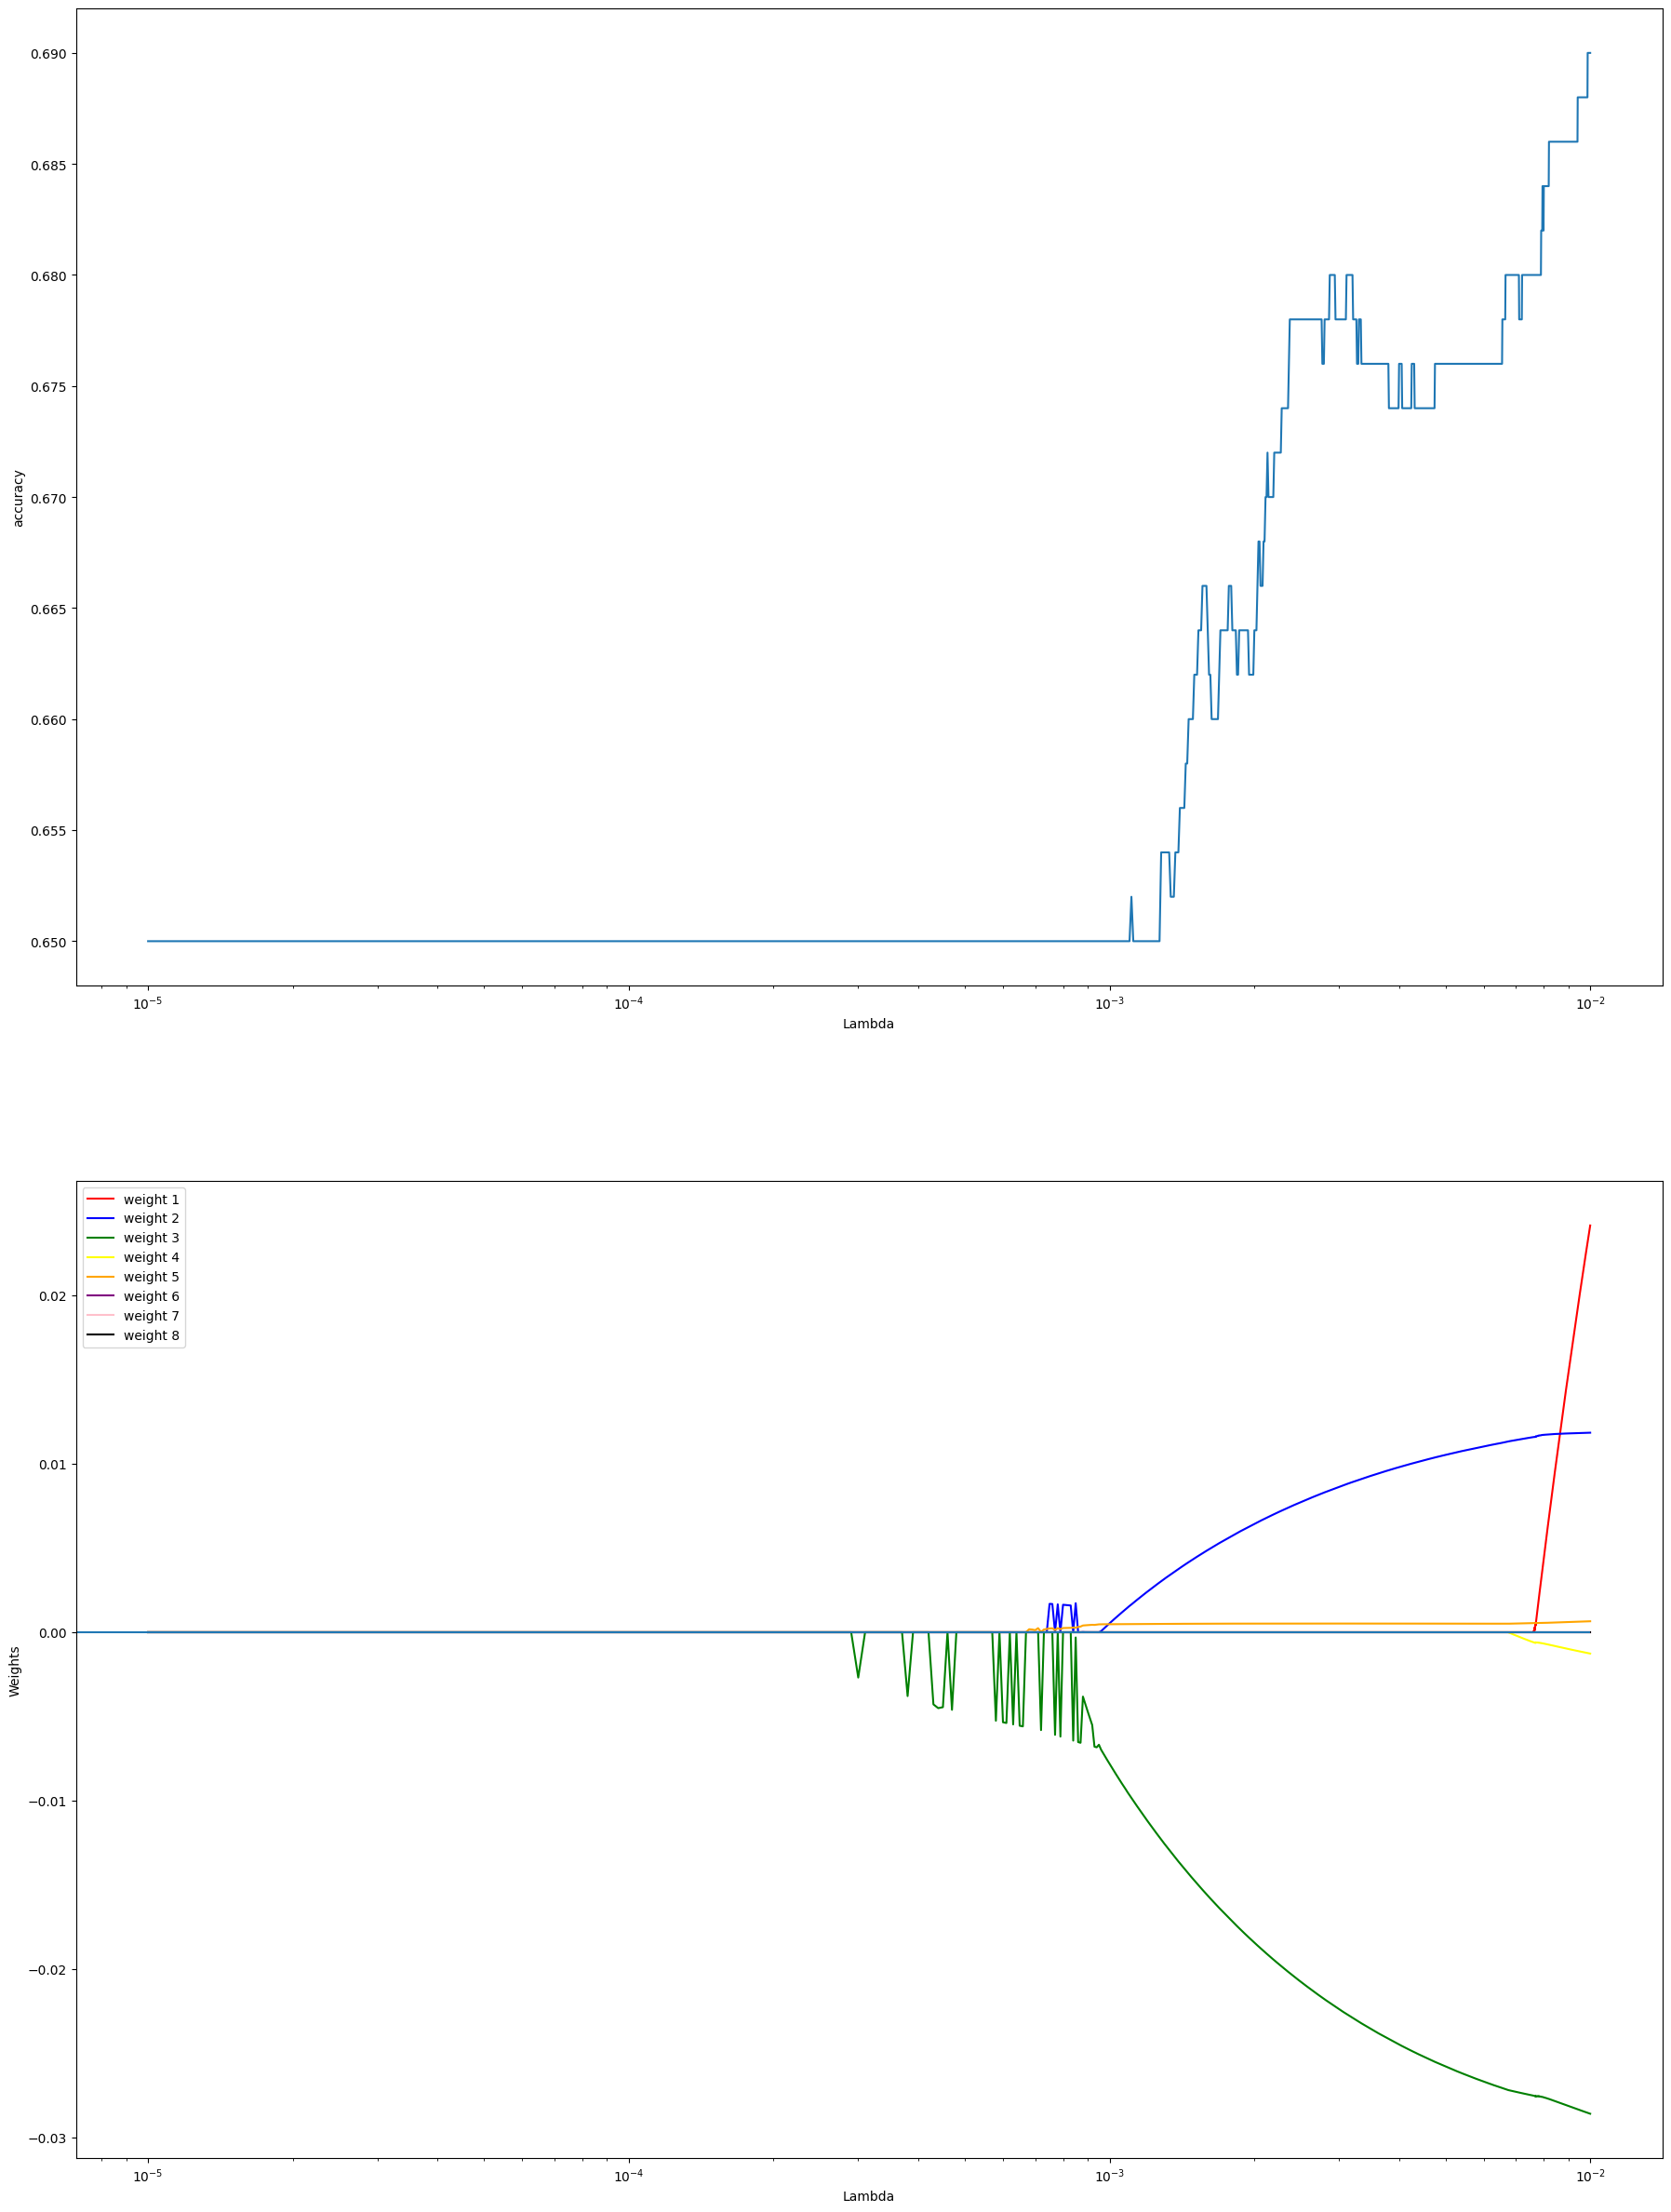

In [69]:
plt.figure(figsize=(19,9),dpi=120)
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(22,30))

ax1.plot(alphas,acc.ravel())
ax2.plot(alphas,res[:,0],color='red',label='weight 1')
ax2.plot(alphas,res[:,1],color='blue',label='weight 2')
ax2.plot(alphas,res[:,2],color='green',label='weight 3')
ax2.plot(alphas,res[:,3],color='yellow',label='weight 4')
ax2.plot(alphas,res[:,4],color='orange',label='weight 5')
ax2.plot(alphas,res[:,5],color='purple',label='weight 6')
ax2.plot(alphas,res[:,6],color='pink',label='weight 7')
ax2.plot(alphas,res[:,7],color='black',label='weight 8')
ax2.legend()

ax1.set(xlabel='Lambda',ylabel='accuracy')
ax2.set(xlabel='Lambda',ylabel='Weights')
ax2.set_xscale('log')
ax1.set_xscale('log')
ax2.hlines(y=0,xmin=0,xmax=10e-3)

LDA (LINEAR DISRIMINENTS ANALYZES)

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

test_size=268/X.shape[0]

X_train,X_test,y_train,y_test=train_test_split(X,YR,test_size=test_size)

LDA= LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)




LinearDiscriminantAnalysis()

In [73]:
LDA.score(X_train,y_train)

0.784

In [74]:
LDA.score(X_test,y_test)

0.7649253731343284

<Figure size 2500x2500 with 0 Axes>

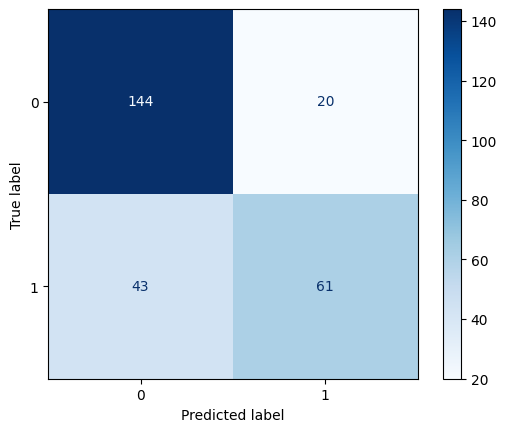

In [75]:
plt.figure(figsize=(25,25))
disp=ConfusionMatrixDisplay.from_estimator(
    LDA,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

QDA

In [76]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

test_size=268/X.shape[0]

X_train,X_test,y_train,y_test=train_test_split(X,YR,test_size=test_size)
QDA=QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [77]:
QDA.score(X_train,y_train)

0.754

In [78]:
QDA.score(X_test,y_test)

0.7723880597014925

<Figure size 2500x2500 with 0 Axes>

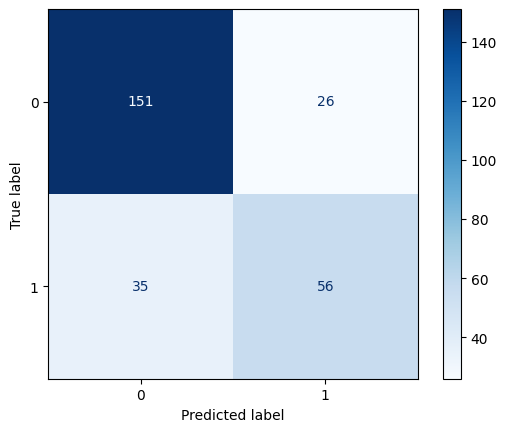

In [79]:
plt.figure(figsize=(25,25))
disp=ConfusionMatrixDisplay.from_estimator(
    QDA,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

SVM (SUPPORT VECTOR MACHINE)

In [80]:
from sklearn import svm
SVM=svm.SVC(kernel='linear')
test_size=268/X.shape[0]
X_train,X_test,y_train,y_test=train_test_split(X,YR,test_size=test_size)
SVM.fit(X_train,y_train)

SVC(kernel='linear')

In [81]:
SVM.score(X_train,y_train)

0.782

In [82]:
SVM.score(X_test,y_test)

0.753731343283582

<Figure size 2500x2500 with 0 Axes>

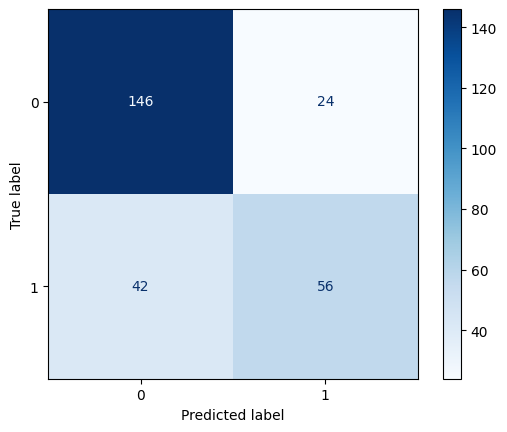

In [83]:
plt.figure(figsize=(25,25))
disp=ConfusionMatrixDisplay.from_estimator(
    SVM,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
test_size=268/X.shape[0]
X_train,X_test,y_train,y_test = train_test_split(X,YR,test_size=test_size)
GNB=GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [87]:
GNB.score(X_train,y_train)

0.78

In [88]:
GNB.score(X_test,y_test)

0.7164179104477612

<Figure size 2500x2500 with 0 Axes>

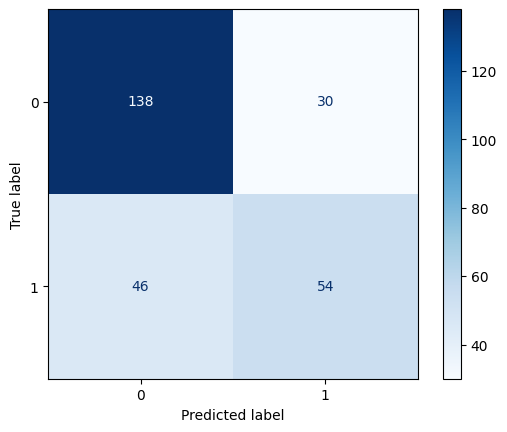

In [89]:
plt.figure(figsize=(25,25))
disp=ConfusionMatrixDisplay.from_estimator(
    GNB,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

Decision Tree

In [93]:
from sklearn import tree

test_size = 268/X.shape[0]
X_train,X_test,y_train,y_test=train_test_split(X,YR,test_size=test_size)

DecisionTree=tree.DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
DecisionTree.score(X_train,y_train)

1.0

In [95]:
DecisionTree.score(X_test,y_test)

0.7313432835820896

<Figure size 2500x2500 with 0 Axes>

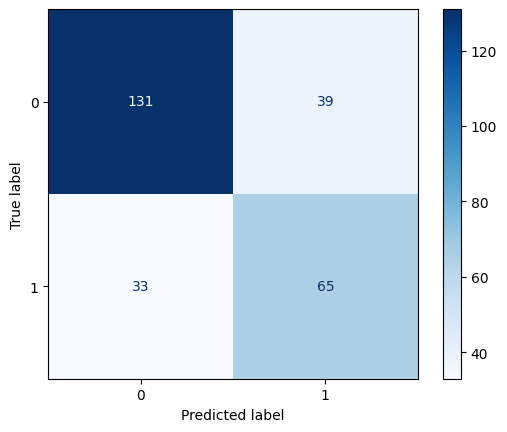

In [96]:
plt.figure(figsize=(25,25))
disp=ConfusionMatrixDisplay.from_estimator(
    DecisionTree,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

In [97]:
fig=plt.figure(figsize=(100,100))
_=tree.plot_tree(DecisionTree,feature_names=Xdf.columns,filled=True)

change samples per leaf 

In [98]:
clf2=tree.DecisionTreeClassifier(min_samples_leaf=10)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [99]:
clf2.score(X_train,y_train)

0.84

In [103]:
clf2.score(X_test,y_test)

0.75

In [101]:
clf3=tree.DecisionTreeClassifier(min_samples_leaf=40)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [102]:
clf2.score(X_train,y_train)

0.84

In [104]:
clf2.score(X_test,y_test)

0.75

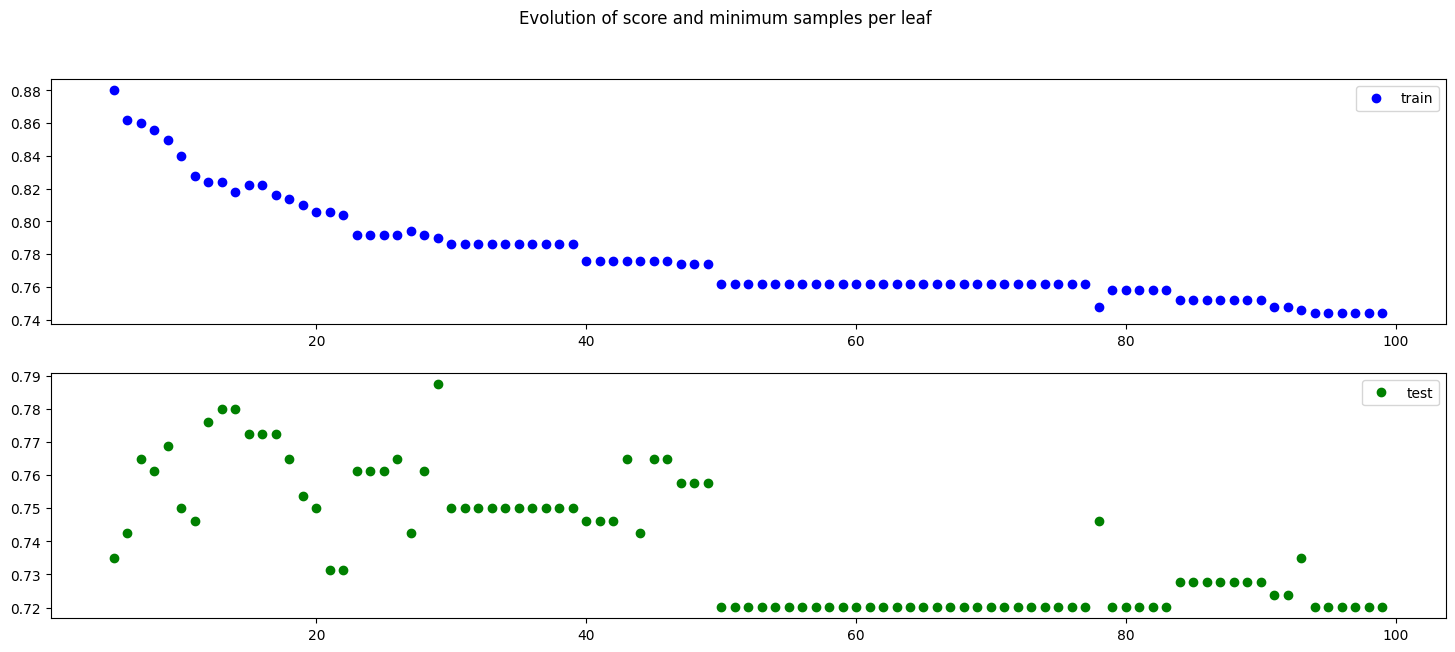

In [109]:
min_=5
max_= 100
range_= max_ - min_
scores_train=np.zeros((range_))
scores_test=np.zeros((range_))
t = np.arange(min_,max_,step=1)

for i, val in enumerate(t):

    clf=tree.DecisionTreeClassifier(min_samples_leaf=val)
    clf.fit(X_train,y_train)
    #print("score Train : ",clf.score(X_train,y_train))
    #print("score Test : ",clf.score(X_test,y_test))
    scores_train[i]=clf.score(X_train,y_train)
    scores_test[i]=clf.score(X_test,y_test)

fig, (ax1,ax2)=plt.subplots(2,1)
fig.set_size_inches(18,7)
fig.suptitle('Evolution of score and minimum samples per leaf')
ax1.plot(t,scores_train,'bo',label='train')
ax2.plot(t,scores_test,'go',label='test')
ax1.legend()
ax2.legend()
plt.show()


Cost Complexity pruning

In [114]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.08823291555372914


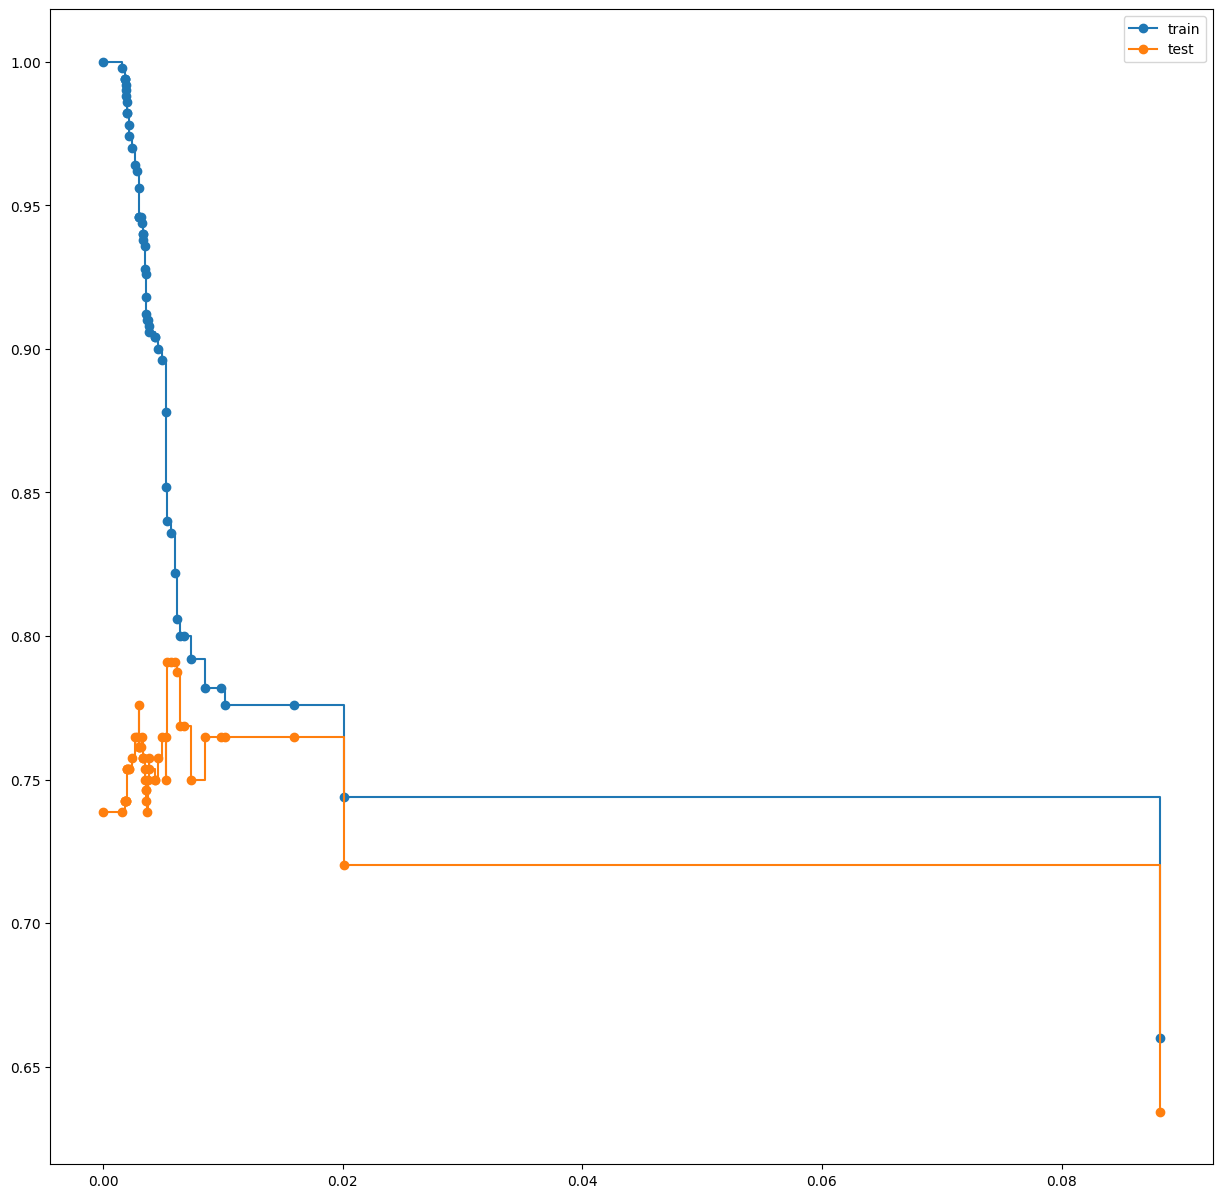

In [116]:
train_scores=[clf.score(X_train,y_train)for clf in clfs]
test_scores= [clf.score(X_test,y_test)for clf in clfs]

fig,ax=plt.subplots(figsize=(15,15))


ax.set_xlabel=("alpha")
ax.set_ylabel=("accuracy")
ax.set_title=("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker="o",label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker="o",label="test",drawstyle="steps-post")

ax.legend()
plt.show()

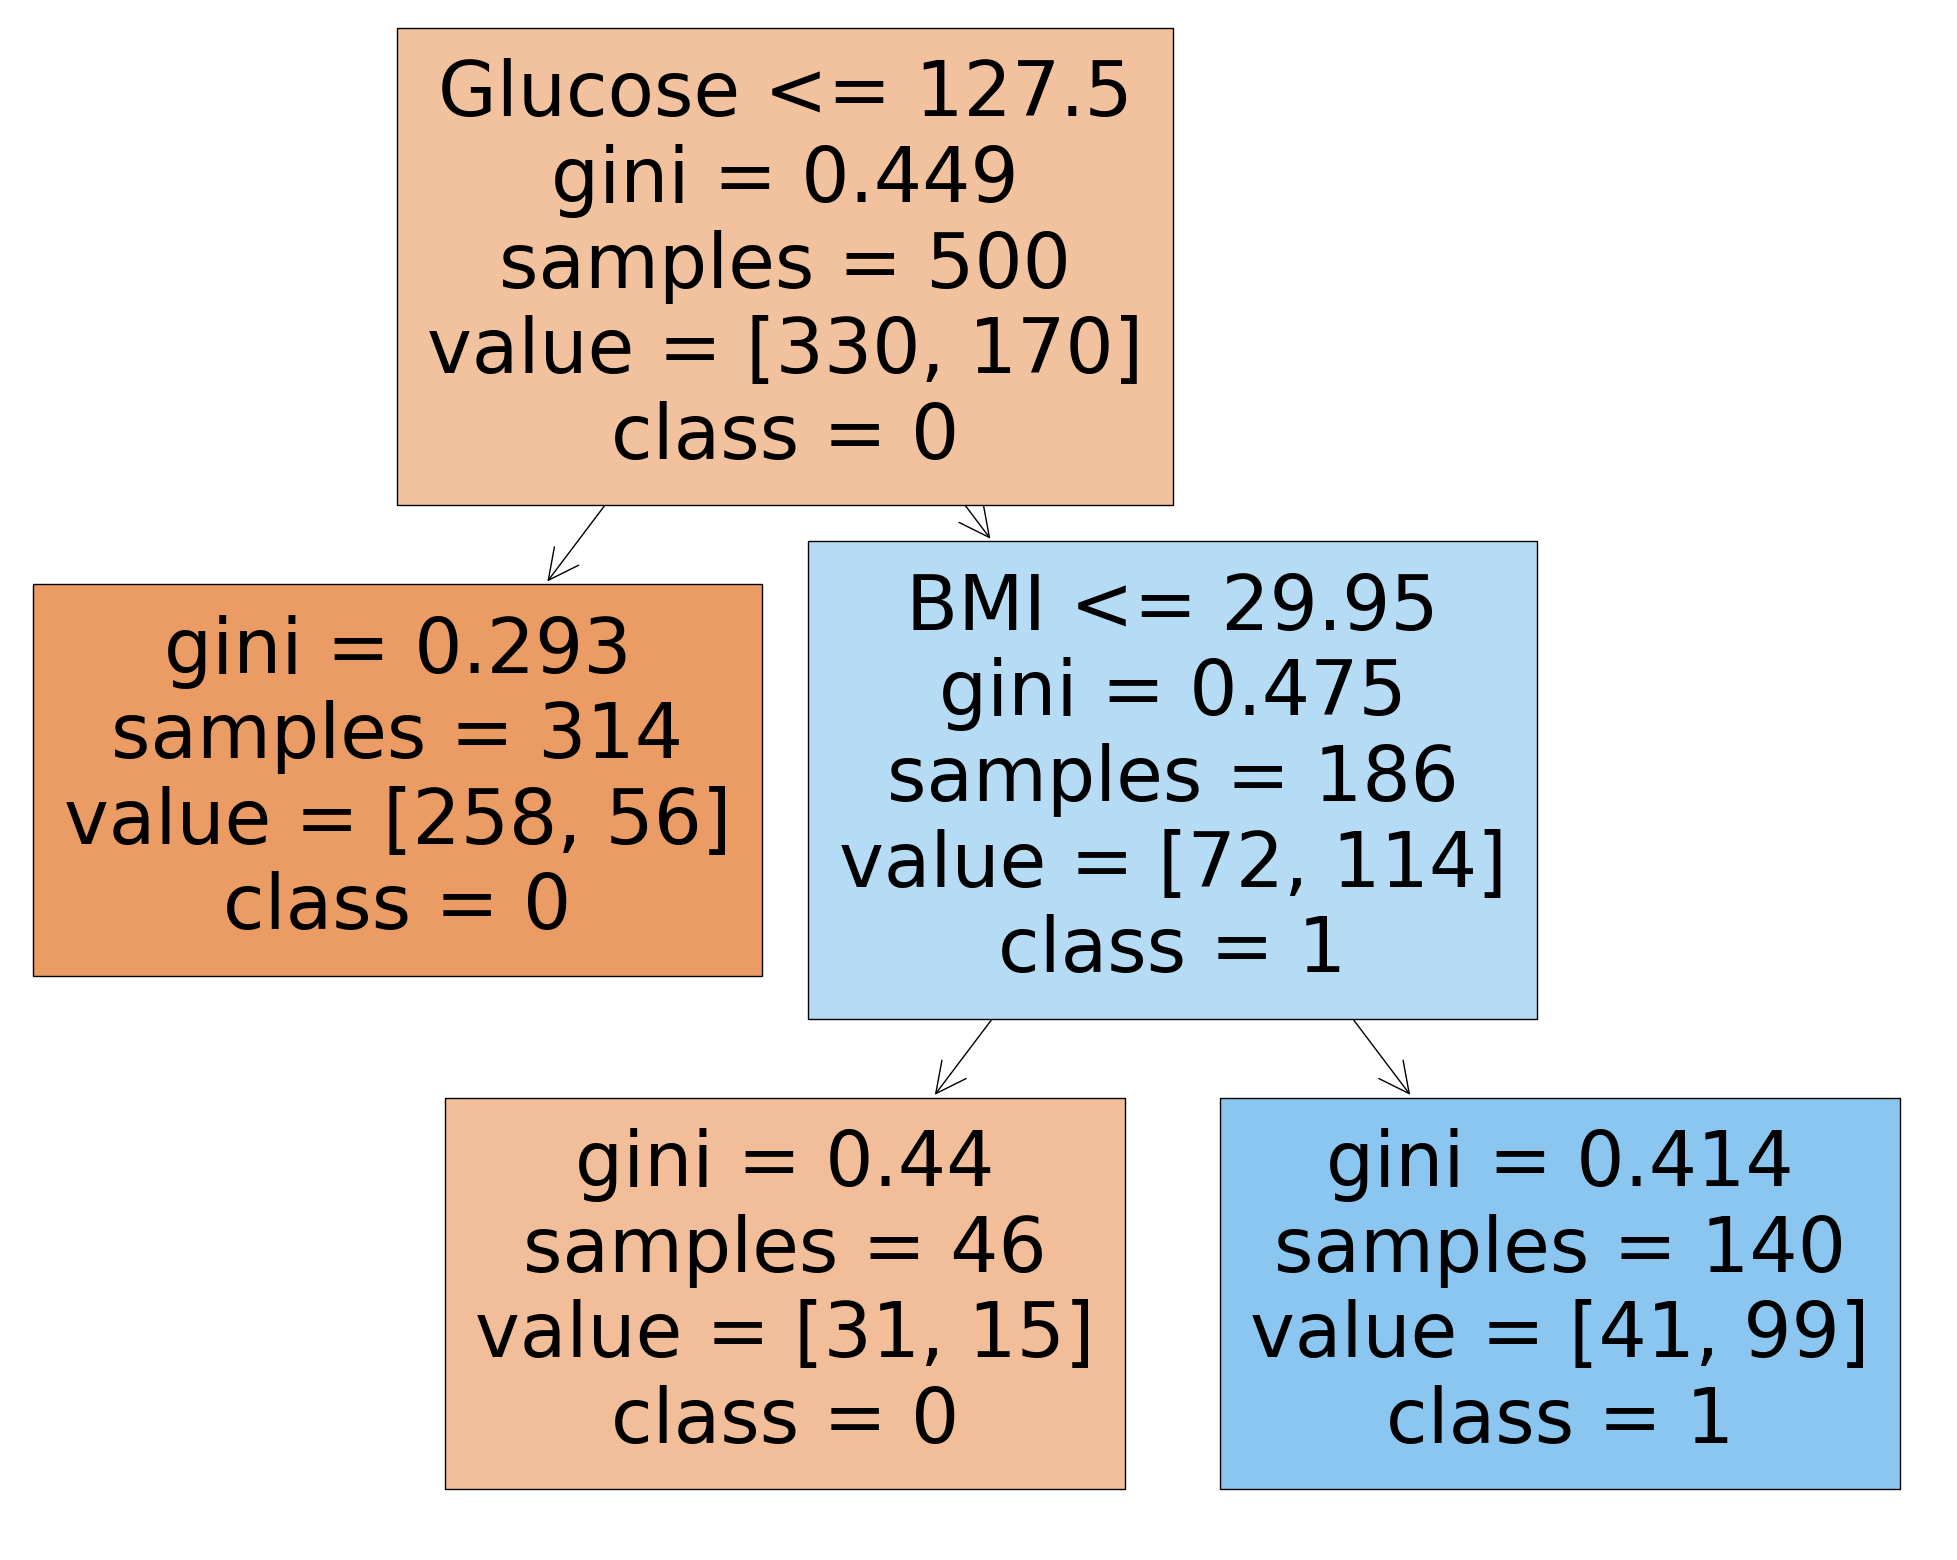

In [117]:
fig=plt.figure(figsize=(25,20))
clf=tree.DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(X_train,y_train)
_=tree.plot_tree(clf,feature_names=Xdf.columns,class_names=["0","1"],filled=True)

In [118]:
clf.score(X_train,y_train)

0.776

In [119]:
clf.score(X_test,y_test)

0.7649253731343284

In [120]:
clf=tree.DecisionTreeClassifier(ccp_alpha=0.021,max_leaf_nodes=15)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.021, max_leaf_nodes=15)

In [121]:
clf.score(X_test,y_test)

0.7201492537313433

In [122]:
clf.score(X_train,y_train)

0.744

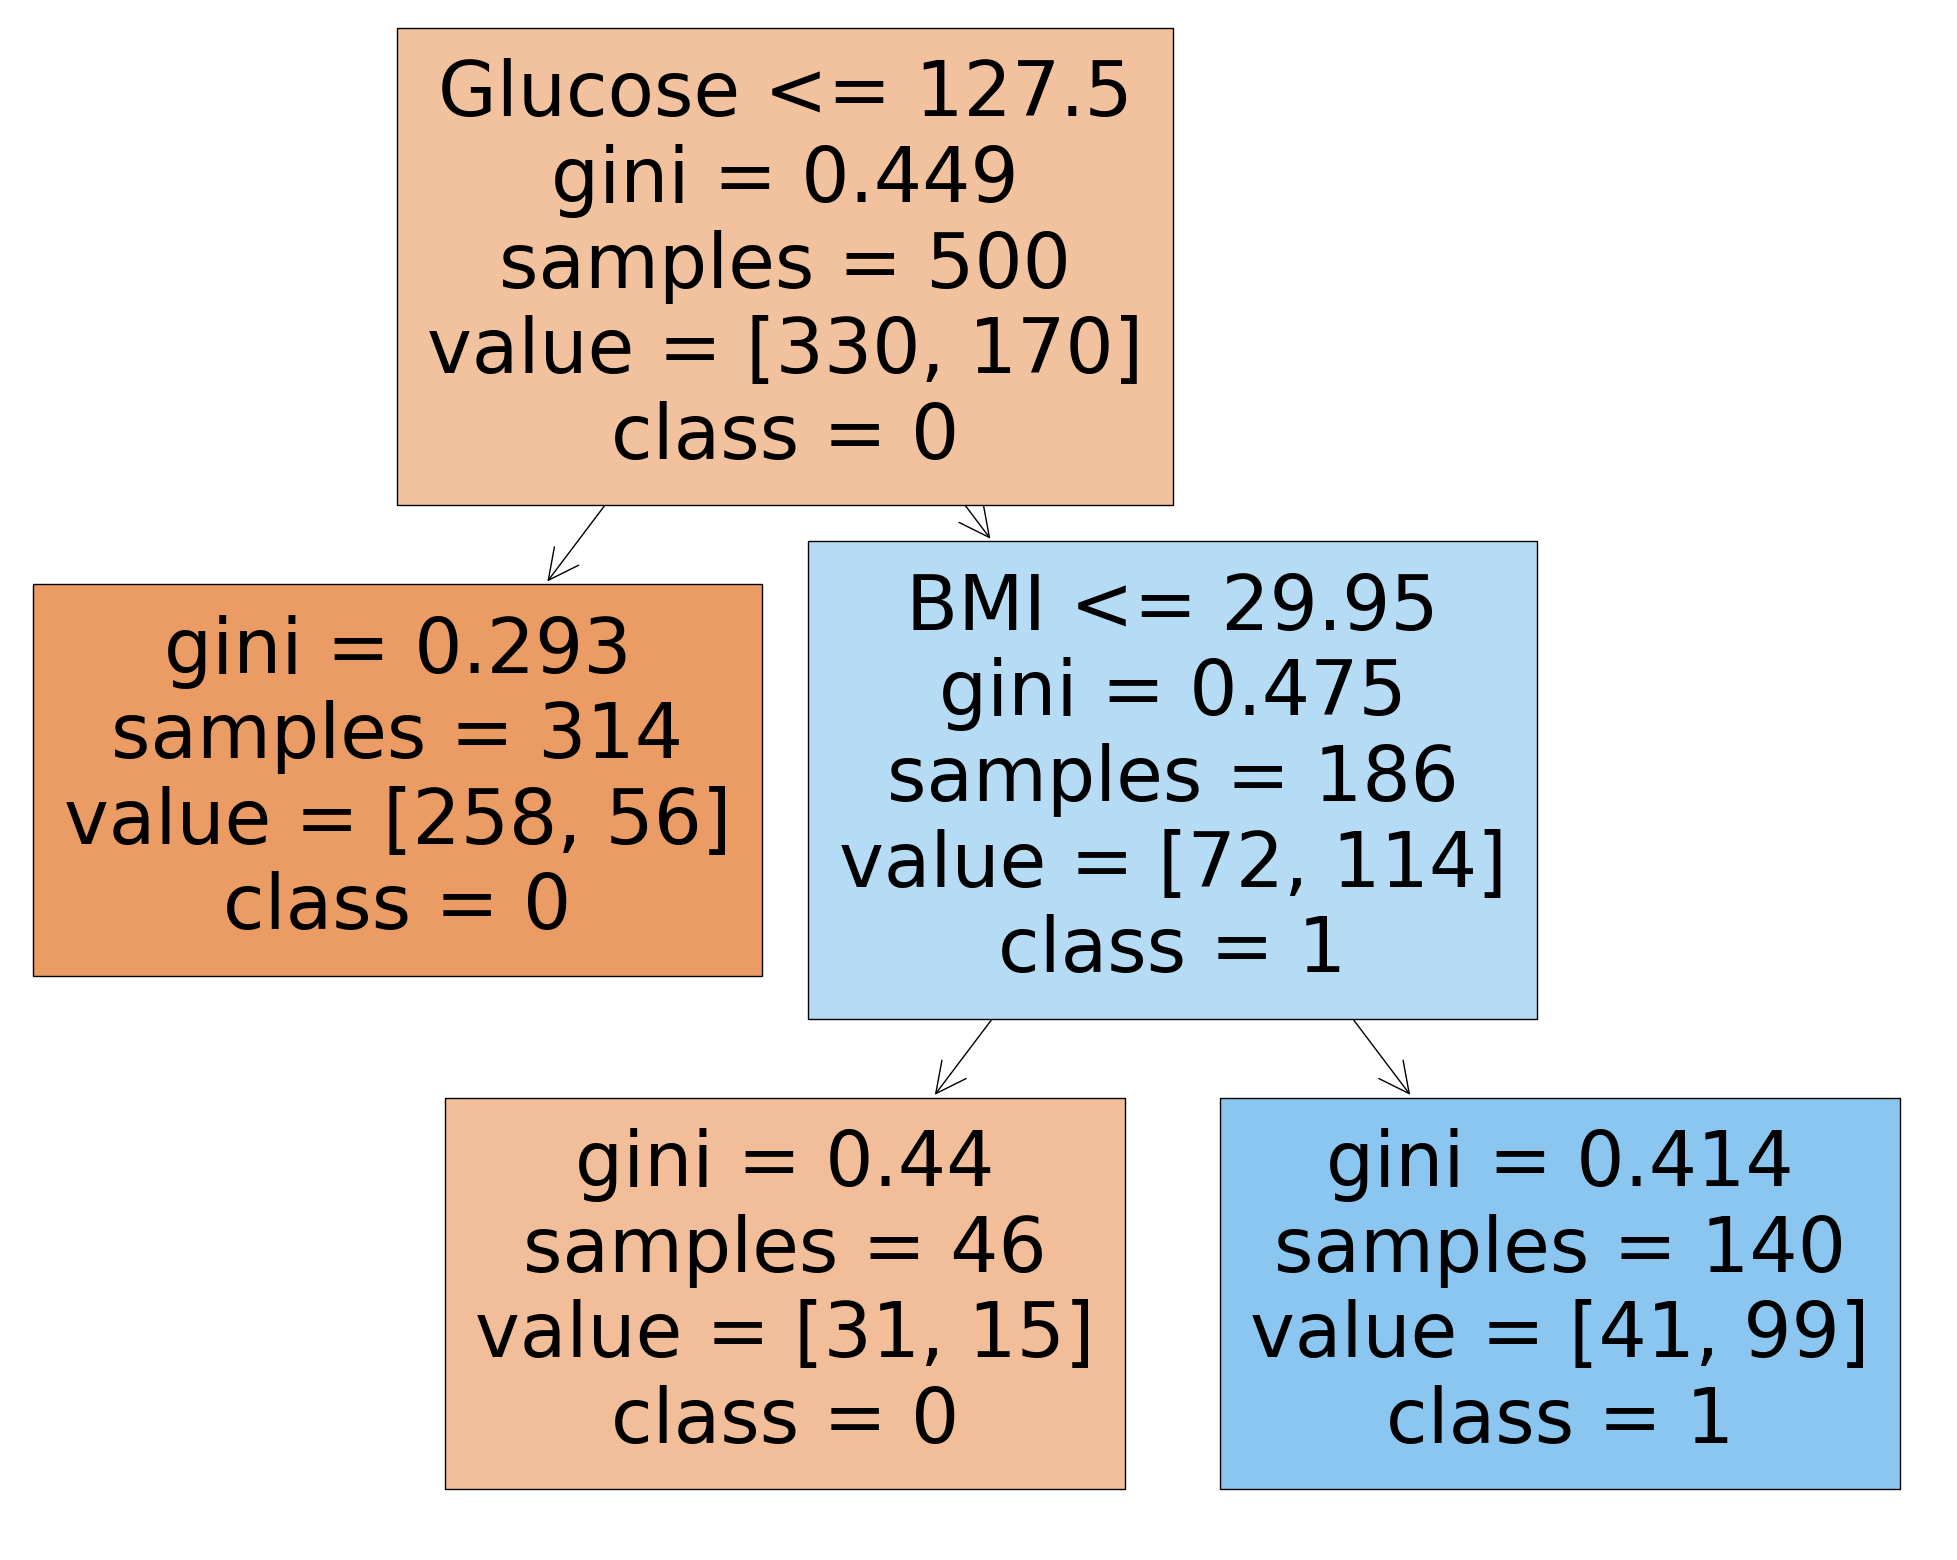

In [123]:
fig=plt.figure(figsize=(25,20))
clf=tree.DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(X_train,y_train)
_=tree.plot_tree(clf,feature_names=Xdf.columns,class_names=["0","1"],filled=True)

In [ ]:
plt.figure(figsize=(25,25))
disp=ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()